In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation



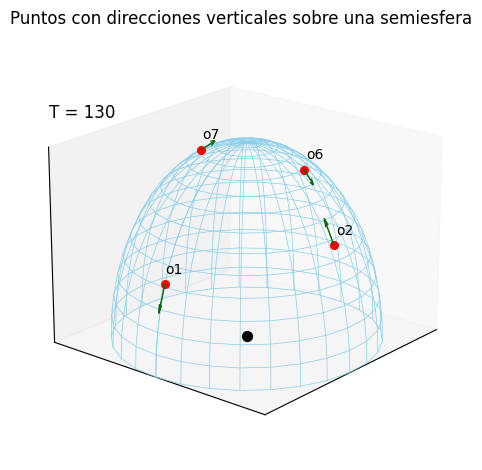

In [35]:
# Crear figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Parámetros
radius = 1

# Dibujar el perímetro de la semiesfera usando líneas de malla
u = np.linspace(0, 2 * np.pi, 30)
v = np.linspace(0, np.pi / 2, 15)

for angle in u:
    x = radius * np.cos(angle) * np.sin(v)
    y = radius * np.sin(angle) * np.sin(v)
    z = radius * np.cos(v)
    ax.plot(x, y, z, color='skyblue', linewidth=0.5)

for height in v:
    x = radius * np.cos(u) * np.sin(height)
    y = radius * np.sin(u) * np.sin(height)
    z = np.ones_like(u) * radius * np.cos(height)
    ax.plot(x, y, z, color='skyblue', linewidth=0.5)

# Punto central
ax.scatter(0, 0, 0, color='black', s=50)

# Puntos y flechas (hacia arriba o hacia abajo)
angles = np.linspace(0, 2 * np.pi, 4, endpoint=False)
heights = np.linspace(0.45, 0.9, 4)  # Alturas distintas


# Etiquetas para los puntos
labels = ['o1', 'o2', 'o6', 'o7']

for i in range(4):
    theta = angles[i]
    h = heights[i]
    phi = np.arccos(h)  # altura → ángulo desde el polo
    r = np.sqrt(1 - h**2)

    # Posición del punto
    x = radius * r * np.cos(theta)
    y = radius * r * np.sin(theta)
    z = radius * h
    ax.scatter(x, y, z, color='red', s=30)

    # Etiqueta
    ax.text(x + 0.08, y + 0.08, z + 0.08, labels[i], fontsize=10, color='black')

    # Flecha (dirección meridional)
    sign = 1 if i % 2 == 0 else -1
    dx = sign * 0.15 * np.cos(phi) * np.cos(theta)
    dy = sign * 0.15 * np.cos(phi) * np.sin(theta)
    dz = sign * -0.15 * np.sin(phi)

    ax.quiver(x, y, z, dx, dy, dz, color='darkgreen', linewidth=1, arrow_length_ratio=0.3)
# Cámara
ax.view_init(elev=20, azim=40)

# Limpiar ejes
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([0, 1])

# Texto en la esquina superior izquierda
ax.text2D(0.05, 0.8, "T = 130", transform=ax.transAxes, fontsize=12, color='black')

ax.set_title("Puntos con direcciones verticales sobre una semiesfera")

plt.tight_layout()
plt.show()